Database Source: https://www.kaggle.com/datasets/arashnic/fitbit

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sympy import symbols, Eq, solve

In [35]:
fit = pd.read_csv('Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
fit

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [36]:
stats = fit.groupby(['Id'])
stats = stats.sum()

stats

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,375619,242.099999,242.099999,0.000000,88.610000,24.620000,128.740000,0.00,1200,594,6818,26293,56309
1624580081,178061,121.360001,121.360001,0.000000,29.120000,11.180000,80.810000,0.19,269,180,4758,38990,45984
1644430081,218489,158.860001,158.860001,0.000000,21.900000,28.530000,108.270001,0.12,287,641,5354,34856,84339
1844505072,79982,52.890000,52.890000,0.000000,0.260000,1.520000,51.069999,0.00,4,40,3579,37405,48778
1927972279,28400,19.670000,19.670000,0.000000,2.970000,0.970000,15.720000,0.00,41,24,1196,40840,67357
2022484408,352490,250.609998,250.609998,0.000000,75.069999,22.320000,153.220000,0.00,1125,600,7981,34490,77809
2026352035,172573,107.100000,107.100000,0.000000,0.190000,0.350000,106.520000,0.00,3,8,7956,21372,47760
2320127002,146223,98.819999,98.819999,0.000000,3.310000,3.030000,92.390000,0.00,42,80,6144,37823,53449
2347167796,171354,114.400000,114.400000,0.000000,19.070000,19.350000,75.990001,0.00,243,370,4545,12369,36782


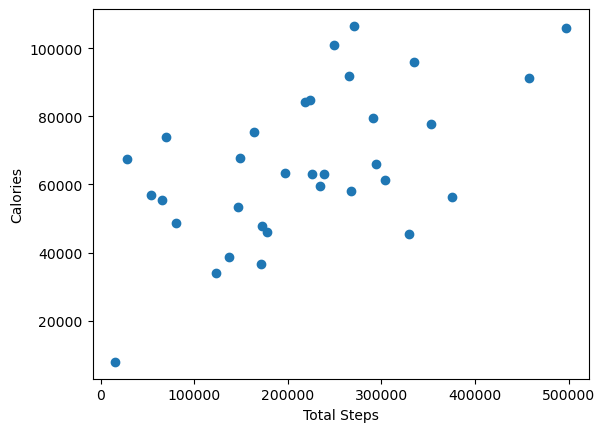

In [37]:
plt.scatter(stats['TotalSteps'], stats['Calories'])
plt.xlabel("Total Steps")
plt.ylabel("Calories")
plt.show()

In [38]:
model = smf.ols(
    formula = 'Calories ~ TotalSteps', 
    data = stats
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     15.02
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           0.000515
Time:                        15:13:25   Log-Likelihood:                -370.17
No. Observations:                  33   AIC:                             744.3
Df Residuals:                      31   BIC:                             747.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.187e+04   6928.582      6.043      0.000    2.77e+04     5.6e+04
TotalSteps     0.1092      0.028      3.876      0.001       0.052       0.167
==============================================================================
Omnibus:                        0.909   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.791
Skew:                          -0.018   Prob(JB):                        0.673
Kurtosis:                       2.243   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Calories')

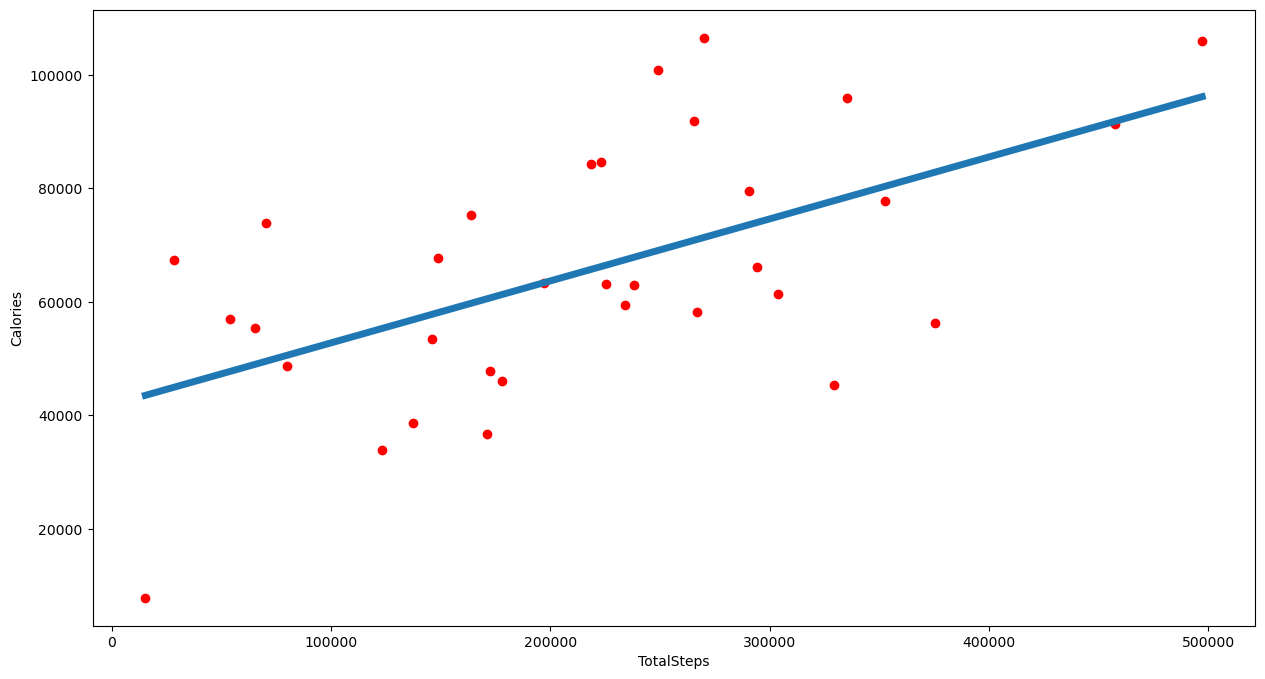

In [39]:
x = stats['TotalSteps']
y = stats['Calories']
beta0, beta1 = model.params

plt.figure(figsize = (15, 8))
plt.plot(x, y, 'ro')

xticks = np.linspace(x.min(), x.max())
plt.plot(xticks, beta0 + beta1 * xticks, lw = 5)

plt.xlabel('TotalSteps')
plt.ylabel('Calories')

In [40]:
def target(goal):
    x = symbols('x')
    y = goal

    equation = Eq(beta0 + beta1 * x, y)
    sol = solve(equation)[0]
    
    if sol < 0:
        return 0

    else:
        return sol

In [41]:
def getInput():
    try:
        goal = eval(input("How many calories do you wish to lose: "))
        
        if goal < 0:
            raise Exception()
            
        else:
            return goal

    except:
        print("You must enter a non-negative number\n")
        return getInput()

In [42]:
goal = getInput()
print(round(target(goal)), 'steps to burn', goal, 'calories')

How many calories do you wish to lose: one
You must enter a non-negative number

How many calories do you wish to lose: -5
You must enter a non-negative number

How many calories do you wish to lose: 42000
1216 steps to burn 42000 calories
